In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import time

# Start timing the script
start_time = time.time()

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of samples
num_samples = 1000

# Function to generate synthetic ncRNA data
def generate_ncRNA_data(samples, features):
    """
    Generates synthetic ncRNA data with added noise.
    
    Parameters:
    samples (int): Number of samples to generate.
    features (int): Number of ncRNA features.
    
    Returns:
    np.ndarray: Generated data with noise.
    """
    data = np.random.rand(samples, features)
    noise = np.random.normal(0, 0.1, data.shape)
    return data + noise

# Function to generate binary labels
def generate_labels(data, noise_level=0.1):
    """
    Generates binary labels based on a weighted sum of the data.
    
    Parameters:
    data (np.ndarray): Input data.
    noise_level (float): Level of noise to add.
    
    Returns:
    np.ndarray: Generated binary labels.
    """
    weights = np.random.rand(data.shape[1])
    linear_combination = np.dot(data, weights) + np.random.randn(data.shape[0]) * noise_level
    threshold = np.percentile(linear_combination, 50)
    return (linear_combination > threshold).astype(int)

# Generate synthetic data for ncRNAs
ncRNA_data = generate_ncRNA_data(num_samples, 50)

# Generate binary labels
labels = generate_labels(ncRNA_data)

# Create DataFrame with ncRNA features and labels
columns = [f'ncRNA_{i}' for i in range(1, 51)]
df = pd.DataFrame(ncRNA_data, columns=columns)
df['label'] = labels

# Function to standardize data
def standardize_data(df, columns):
    """
    Standardizes the given DataFrame columns.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame.
    columns (list): List of column names to standardize.
    
    Returns:
    pd.DataFrame: Standardized DataFrame.
    """
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

# Standardize ncRNA data
df = standardize_data(df, columns)

# Save the dataset to a CSV file
output_file = 'ncRNA_dataset.csv'
df.to_csv(output_file, index=False)

# End timing the script
end_time = time.time()

# Print completion message and runtime
print(f"Dataset ! Saved to {output_file}")
print(f"Runtime: {end_time - start_time:.2f} seconds")

# Display the first few rows of the dataset
print(df.head())


Dataset ! Saved to ncRNA_dataset.csv
Runtime: 0.28 seconds
    ncRNA_1   ncRNA_2   ncRNA_3   ncRNA_4   ncRNA_5   ncRNA_6   ncRNA_7  \
0 -0.412172  1.879331  0.955948  0.022259 -0.544330 -1.648000 -1.397703   
1  1.803207  0.766971  1.860900  1.426351 -0.193275  1.238373 -2.036777   
2 -1.214340  0.351375 -0.576738  0.204499  1.089868 -0.818099 -0.100890   
3  1.441184 -0.824570 -0.835066 -0.508383  1.557503 -0.944379  0.197742   
4  0.050070 -2.181085 -0.940820  0.727335  0.173459 -1.359561 -1.281110   

    ncRNA_8   ncRNA_9  ncRNA_10  ...  ncRNA_42  ncRNA_43  ncRNA_44  ncRNA_45  \
0  0.940515 -0.132584  0.335745  ...  0.378543 -0.632031  1.175287 -0.951176   
1 -1.402866 -1.875007 -0.766934  ...  0.804654  0.655227 -0.049906  0.756666   
2  1.393012 -1.057598 -1.529411  ... -0.450884  0.248563 -0.047237 -0.598431   
3  1.158789 -0.886648  0.733119  ...  1.767104  1.400103  0.702738 -0.758179   
4  0.332379 -2.174547 -1.134659  ...  1.939435  1.205522 -0.608840 -1.748780   

   ncRNA_

Accuracy: 78.50%
Precision: 77.23%
Recall: 79.59%
F1 Score: 78.39%
ROC AUC: 87.23%


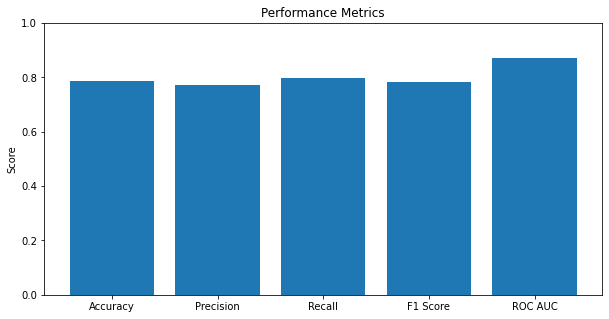

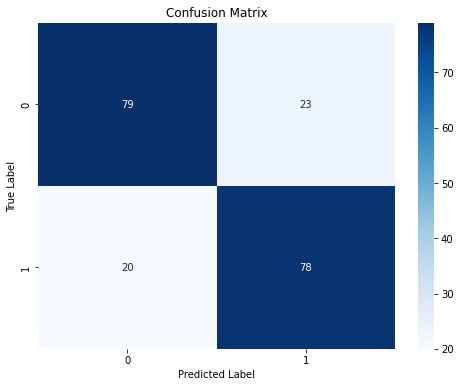

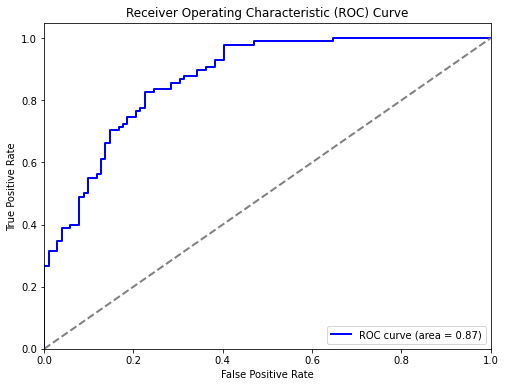

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('ncRNA_dataset.csv')

# Preprocess the dataset
X = df.drop('label', axis=1).values
y = df['label'].values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the AdaBoost model
model = AdaBoostClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'ROC AUC: {roc_auc * 100:.2f}%')

# Visualization of performance metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

plt.figure(figsize=(10, 5))
plt.bar(metrics.keys(), metrics.values())
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Visualizing ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
